# BCI homework

# Brain-Computer Interfaces (Fall 2017, ELE 594)
# Instructor: Yalda Shahriari

# 1st homework, 9/23/17 (The homework, is due by Oct 4, 11:55 pm).

# Instruction: 
Load the “sampleEEGdata” into your Matlab workspace. 
This EEG dataset contains 64 channels (EEG.nbchan), 640 time points (EEG.pnts), and 99 trials (EEG.trials). 
The time points in ms has been saved in EEG.times where you can see each trial has been started 
from -1000 ms and ends at ~1500 ms. 
Use the topoplot.m function for plotting the head plots. 
Save the ‘eloc64C2.txt’ file in the same directory as the topoplot.m function for further analysis. 

In [1]:
# Here are the functions, 
# which reconstructs the dictionaries just use this loadmat instead of scipy.io's loadmat:

import scipy.io as spio
import numpy as np

sampleEEGdata = spio.loadmat('sampleEEGdata.mat')  #.loa ('sampleEEGdata.mat')
# sampleEEGdata['EEG'][0, 0].dtype
eeg = sampleEEGdata['EEG'][0, 0]
eeg.dtype

dtype([('setname', 'O'), ('filename', 'O'), ('filepath', 'O'), ('subject', 'O'), ('group', 'O'), ('condition', 'O'), ('session', 'O'), ('comments', 'O'), ('nbchan', 'O'), ('trials', 'O'), ('pnts', 'O'), ('srate', 'O'), ('xmin', 'O'), ('xmax', 'O'), ('times', 'O'), ('data', 'O'), ('icaact', 'O'), ('icawinv', 'O'), ('icasphere', 'O'), ('icaweights', 'O'), ('icachansind', 'O'), ('chanlocs', 'O'), ('urchanlocs', 'O'), ('chaninfo', 'O'), ('ref', 'O'), ('event', 'O'), ('urevent', 'O'), ('eventdescription', 'O'), ('epoch', 'O'), ('epochdescription', 'O'), ('reject', 'O'), ('stats', 'O'), ('specdata', 'O'), ('specicaact', 'O'), ('splinefile', 'O'), ('icasplinefile', 'O'), ('dipfit', 'O'), ('history', 'O'), ('saved', 'O'), ('etc', 'O'), ('spedata', 'O')])

g) (Optional) Now consider the frequency range varies between 2Hz to 30Hz in two steps.
Instead of constant cycle equivalent to 4 (what we had before), 
consider variable cycles ranging between [3 10] cycle. 
Based on your total number of frequencies, 
you can define constant steps for your cycles where it starts from 3 cycles and ends at 10 cycles. 

3 would correspond to the minimum frequency (i.e. 2 Hz) and 10 would correspond to the maximum frequency 
(i.e. 30 Hz).

Considering only channel ‘FCz’, for each frequency, obtain the power for all the trials (i.e. 99).

Get the average of the powers over all the trials. 

Apply baseline correction by dividing the obtained results to the average baseline power (i.e. [-500 -200 ms]). 

The resulting matrix size would be 20 x 640. 

Plot the time-frequency map where the x-axis is the time [-200 1000 ms], 
y-axis is the frequency [2 30 Hz], and color corresponds to 10log10 (power). 

Make the colormaps in ‘jet’ format and the color-limit to [-3 3]. 

Repeat the same process with fixed cycle 4 for all the frequencies.

Compare your results between two conditions of fixed and variable cycles and explain your observations. 

freq: 2.0 cycles: 3.0 scale: 0.833333333333


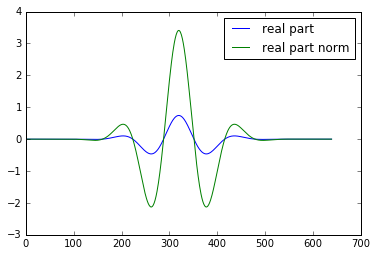

freq: 4.0 cycles: 3.3684210526315788 scale: 1.484375


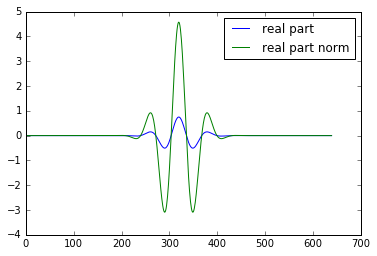

freq: 6.0 cycles: 3.736842105263158 scale: 2.00704225352


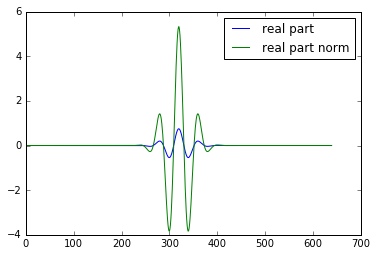

freq: 8.0 cycles: 4.105263157894736 scale: 2.4358974359


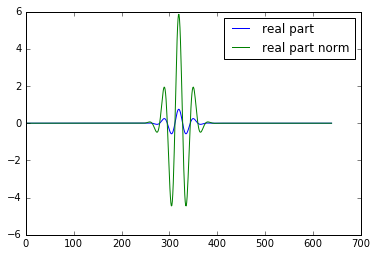

freq: 10.0 cycles: 4.473684210526316 scale: 2.79411764706


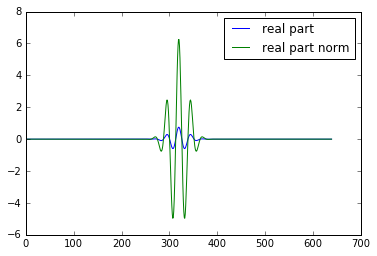

freq: 12.0 cycles: 4.842105263157895 scale: 3.09782608696


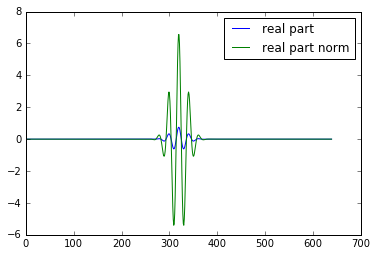

freq: 14.0 cycles: 5.2105263157894735 scale: 3.35858585859


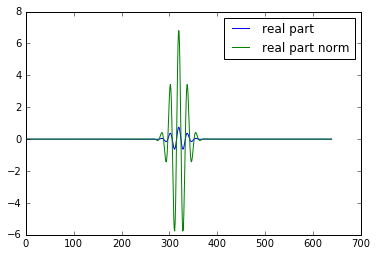

freq: 16.0 cycles: 5.578947368421053 scale: 3.58490566038


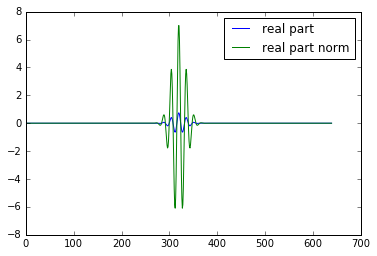

freq: 18.0 cycles: 5.947368421052632 scale: 3.78318584071


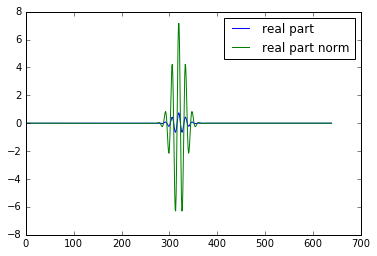

freq: 20.0 cycles: 6.315789473684211 scale: 3.95833333333


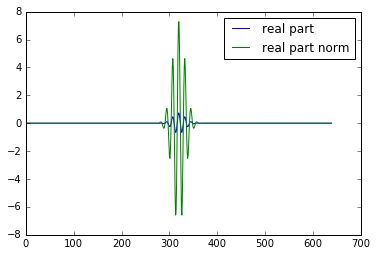

freq: 22.0 cycles: 6.684210526315789 scale: 4.11417322835


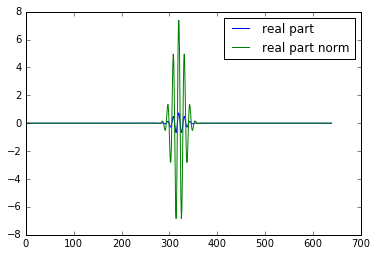

freq: 24.0 cycles: 7.052631578947368 scale: 4.25373134328


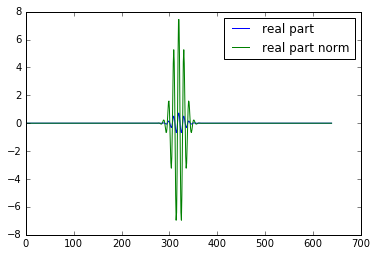

freq: 26.0 cycles: 7.421052631578947 scale: 4.37943262411


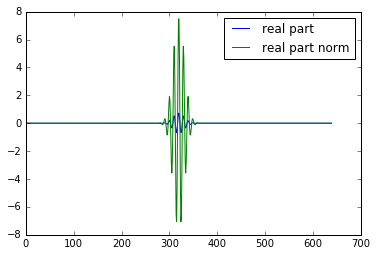

freq: 28.0 cycles: 7.789473684210526 scale: 4.49324324324


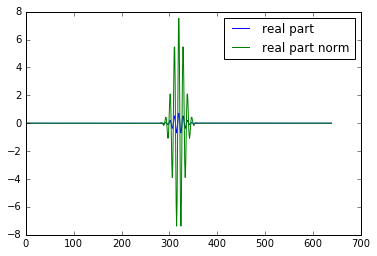

freq: 30.0 cycles: 8.157894736842106 scale: 4.59677419355


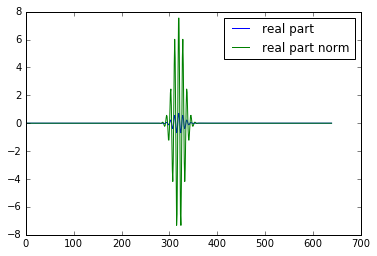

freq: 32.0 cycles: 8.526315789473685 scale: 4.69135802469


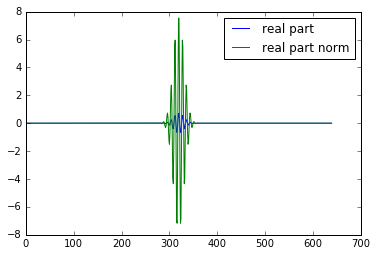

freq: 34.0 cycles: 8.894736842105264 scale: 4.77810650888


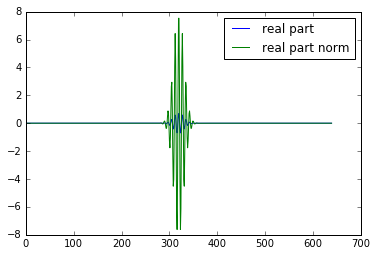

freq: 36.0 cycles: 9.263157894736842 scale: 4.85795454545


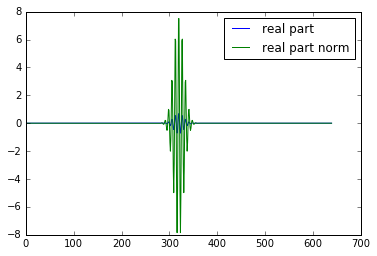

freq: 38.0 cycles: 9.631578947368421 scale: 4.93169398907


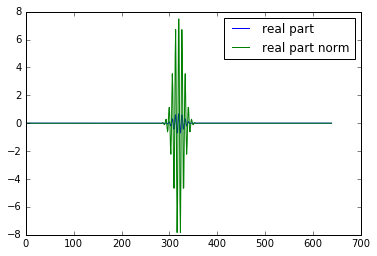

freq: 40.0 cycles: 10.0 scale: 5.0


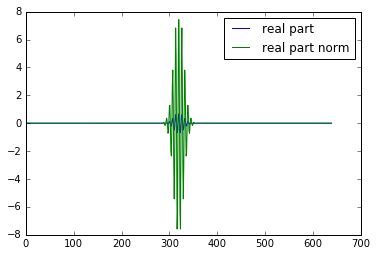

In [17]:
import scipy.signal as sp_signal
import matplotlib.pyplot as plt

# r: Sampling rate of EEG and the length of EEG signal
# M: number of points in a channel should be equal to the EEG signal length
# s: constant number of cycles -2*pi*s to +2*pi*s
# f: Wavelet freq for activity  pattern recognition
# w: The number of cycles/ period of the phase/real part
r, s, w, M, f = eeg['srate'][0, 0], 1.0, 3.0, data2.shape[1], 2
wavelet_bank = []

def normalize(X):
    return (X - X.mean(axis=0))/ X.std(axis=0)

# Wavelet frequencies from 2 Hz to 30 Hz: 7 choices, 28 = 7 * 4
# Number of cycles from 3 cycles to 10 cycles: 7 choices
# for w in range(3, 11, 1): # including 3 and 10
# f = (2*s*r*w)/ M
# for f in range(2, 42, 2): # start=2Hz, stop=42, step=2, 42-2=40, 40/2=20
for step in range(0, 20, 1): # start=2Hz, stop=42, step=2, 42-2=40, 40/2=20
    # f: 2 to 40, 38/19, step 2
    # W: 3 to 10,  7/19=0.35 step
    w = 3 + ((7/19) * step) 
    f = 2 + ((38/19) * step)
    # w = (f*M) / (2*s*r)
    s = (f*M) / (2*w*r)
    print('freq:', f, 'cycles:', w, 'scale:', s)

    wavelet = sp_signal.morlet(M=M, w=w, s=s, complete=True)
    wavelet_bank.append(wavelet)

    # Now calculate Amplitude & Phase
    A = ((wavelet.real**2) + (wavelet.imag**2))**0.5
    A_norm = normalize(X=A)
    P = np.arctan(wavelet.imag/wavelet.real) # imag=y, real=x
    P_norm = normalize(X=P)
    wavelet_real_norm = normalize(X=wavelet.real)
    wavelet_imag_norm = normalize(X=wavelet.imag)

    # plotting
    plt.plot(wavelet.real, label='real part')
#     plt.plot(wavelet.imag, label='imag part')
    plt.plot(wavelet_real_norm, label='real part norm')
#     plt.plot(wavelet_imag_norm, label='imag part norm')
#     plt.plot(A, label='Amplitude part')
#     plt.plot(A_norm, label='Amplitude part norm')
#     plt.plot(P, label='Phase part')
#     plt.plot(P_norm, label='Phase part norm')
    plt.legend()
    plt.show()

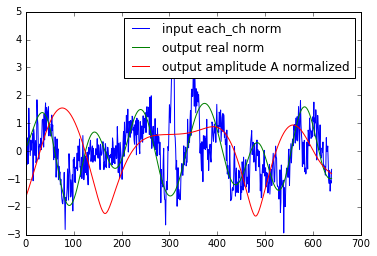

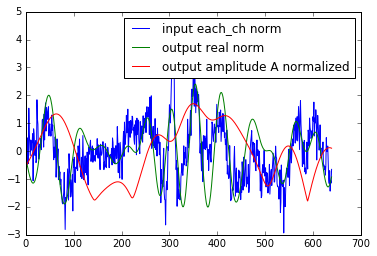

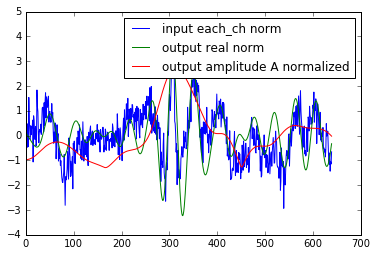

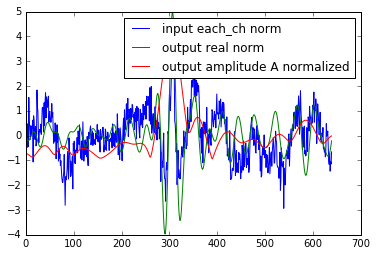

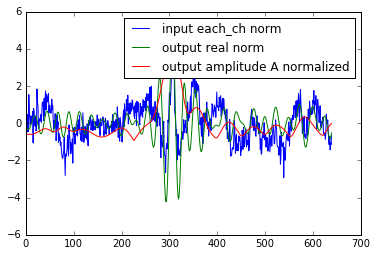

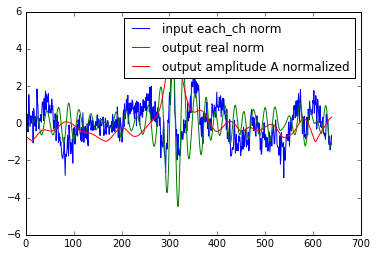

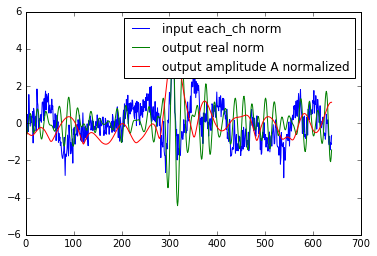

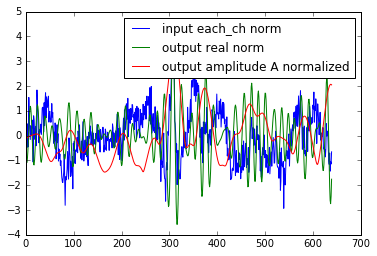

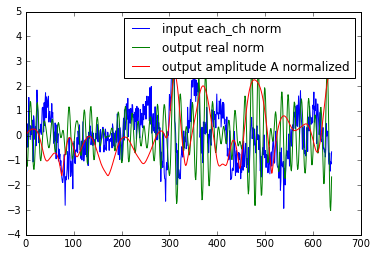

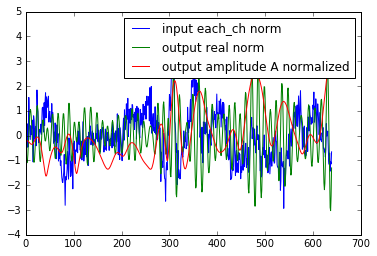

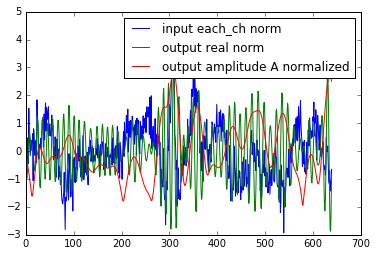

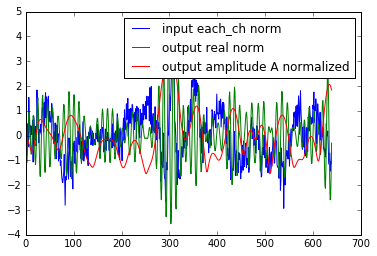

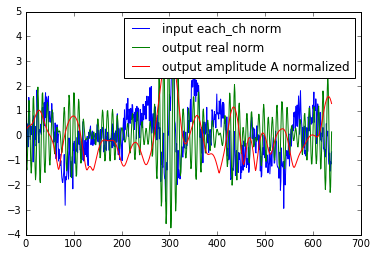

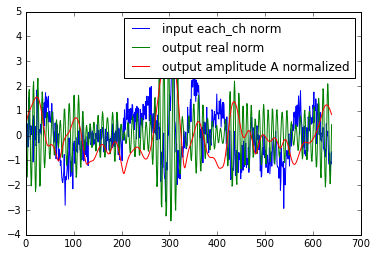

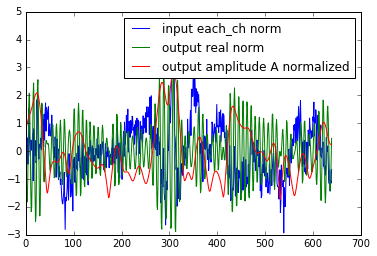

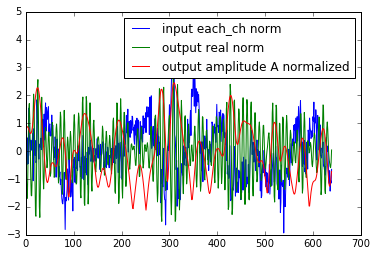

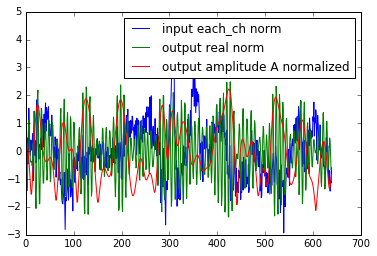

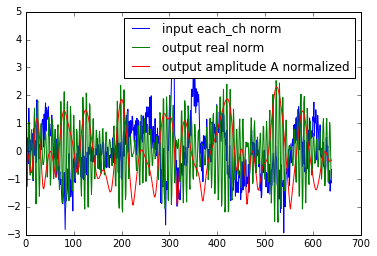

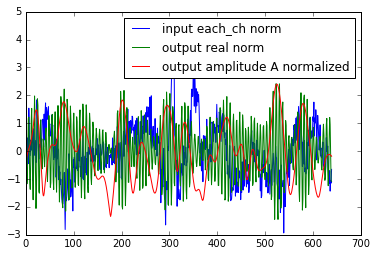

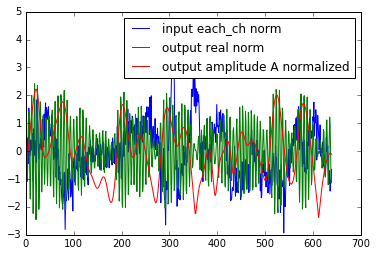

In [18]:
# for each_wavelet in wavelet_bank:
for idx_wvl in range(len(wavelet_bank)):
    Amp, Phase, Amp_norm, Phase_norm = [], [], [], [] # Amplitude, Phase
    b_real, b_imag, b_real_norm, b_imag_norm = [], [], [], [] # convolved output
    
    # for each_ch in data2: # for all channels
    for idx_ch in range(0, 1, 1): # for all channels

        # Real and imaginary part of the complex output of convolution
        b = np.convolve(a=data2[idx_ch], mode='same', v=wavelet_bank[idx_wvl])
        data_norm = normalize(X=data2[idx_ch])
        b_real_norm = normalize(X=b.real)
        b_imag_norm = normalize(X=b.imag)
        
        # Amplitude and Phase of the complex output of convolution
        A = ((b.real**2) + (b.imag**2))**0.5
        A_norm = normalize(X=A)
        P = np.arctan(b.imag/b.real) # imag=y, real=x 
        P_norm = normalize(X=P)
    
        # ploting the convolved signal
#         plt.plot(data2[idx_ch], label='input each_ch')
        plt.plot(data_norm, label='input each_ch norm')
        # plt.plot(b.real, label='output real')
        plt.plot(b_real_norm, label='output real norm')
        # plt.plot(b.imag, label='output imag')
        # plt.plot(A, label='output amplitude A')
        plt.plot(A_norm, label='output amplitude A normalized')
        # plt.plot(P, label='output phase P')
        plt.legend()
        plt.show()

Considering only channel ‘FCz’, for each frequency, obtain the power for all the trials (i.e. 99).
Get the average of the powers over all the trials. 
Apply baseline correction by dividing the obtained results to the average baseline power (i.e. [-500 -200 ms]). 
The resulting matrix size would be 20 x 640. 
Plot the time-frequency map where the x-axis is the time [-200 1000 ms], 
y-axis is the frequency [2 30 Hz], and color corresponds to 10log10 (power). 
Make the colormaps in ‘jet’ format and the color-limit to [-3 3]. 

In [20]:
index = ch_names.index('FCz')
# data[index].shape
data_FCz = eeg['data'][index].T
data_FCz.shape, len(wavelet_bank), data.shape

((99, 640), 20, (99, 64, 640))

In [21]:
#  Convolving the data with one wavelet, extracting real and imag part and calculate 
# Amplitude for time domain patterns and 
# Phase for frequency domain patterns
data_KxTxN = [] 

data_KxTxN_norm = [] 

for each_wavelet in wavelet_bank:
    Amp, Phase, Amp_norm, Phase_norm = [], [], [], [] # Amplitude, Phase
    b_real, b_imag, b_real_norm, b_imag_norm = [], [], [], [] # convolved output
    
    for each_trial in data_FCz: # for all channels
        # Real and imaginary part of the complex output of convolution
        b = np.convolve(a=each_trial, mode='same', v=each_wavelet)
        b_real_norm = normalize(X=b.real)
        b_imag_norm = normalize(X=b.imag)
        
        # Amplitude and Phase of the complex output of convolution
        A = ((b.real**2) + (b.imag**2))**0.5
        A_norm = normalize(X=A)
        
#         P = np.arctan(b.imag/b.real) # imag=y, real=x 
#         P_norm = normalize(X=P)
        Amp_norm.append(A_norm)
        Amp.append(A)
#         Phase_norm.append(P_norm)
        
    data_KxTxN_norm.append(Amp_norm)
    data_KxTxN.append(Amp)
    
data_KxTxN = np.array(data_KxTxN)

data_KxTxN_norm = np.array(data_KxTxN_norm)

data_KxTxN.shape # kx2xCxN: (7, 2, 448, 640)

(20, 99, 640)

In [22]:
data_KxN = data_KxTxN.mean(axis=1) # 20x640

data_KxN_norm = data_KxTxN_norm.mean(axis=1) # 20x640

data_KxN.shape

(20, 640)

In [23]:
# Apply baseline correction by dividing the obtained results 
# to the average baseline power (i.e. [-500 -200 ms]).
srate = eeg['srate'][0, 0]
low = int(0.5 * srate) # -1000 - (-500) = 500, srate = 1/T, t/T, t/(1/f)= t*f
length = int(0.3 * srate) # -500 - (-200) = -300, srate = 1/T, t/T, t/(1/f)= t*f
low, length, low+length
data_KxN[:, low: (low+length)].shape
baseline = data_KxN[:, low: (low+length)].copy()
baseline.shape, baseline.mean(axis=1).shape
average_baseline_power = baseline.mean(axis=1).reshape(-1, 1)
data_KxN_baseline_corrected =  data_KxN/ average_baseline_power
data_KxN_baseline_corrected.shape

(20, 640)

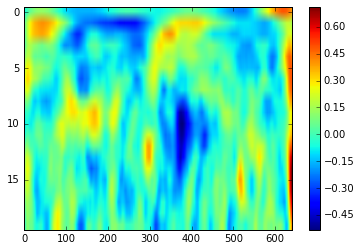

In [25]:
# Plot the time-frequency map where the
# x-axis is the time [-200 1000 ms], 
# y-axis is the frequency [2 42 Hz], and 
# color corresponds to 10log10 (power). 
# x = np.arange(-1500, 1000, 1) # milisecond or ms
# y = np.arange(2, 42, 2) # Hz for frequency
# plt.Figure(figsize= (20, 10), )
# plt.imshow(shape=(20, 20), X=data_KxN)
# plt.imshow(X=data_KxN, aspect=40, extent=(-1500, 1000, 2, 40)) #cmap=10 * np.log10(data_KxN)
plt.imshow(X=data_KxN_norm, aspect='auto') #cmap=10 * np.log10(data_KxN)
plt.colorbar()
plt.show()

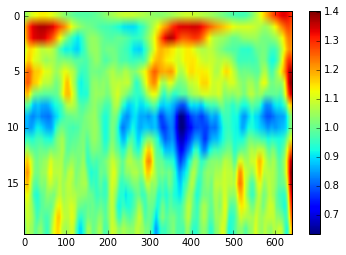

In [26]:
# plt.imshow(X=data_KxN_baseline_corrected - data_KxN_baseline_corrected.mean(), aspect=40, extent=(-1500, 1000, 40, 2)) #cmap=10 * np.log10(data_KxN)

plt.imshow(X=data_KxN_baseline_corrected, aspect='auto') #cmap=10 * np.log10(data_KxN)



plt.colorbar()
plt.show()